In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


### 1. Data preprocessing
1. missing values
Check if there's any missing value. Minimum payments has 313 missing values and credit limit has 1, we filled it with the median value of minimum payments
--we used median as median is less sensitive to dataset than mean.

2. Feature Scaling
(Before we process feature scaling, we dropped the cust_id column as it's not useful for our clustering)

3. PCA analysis 
It appears that the first 6-7 principal components explain a significant portion of the variance in the data.
--impact: Using fewer components can make the clustering process more efficient and easier to visualize.
Each feature contributes equally to the distance metric after scaling data.
PCA can filter out noise data and make clusters more precise.

### 2. EDA analysis
1. create histplot for each numerical values and analyze the distribution

2. used IQR and boxplot to drop outlierr. As there are many columns, i used IQR first but then found out there are still lots of outliers.
I then used boxplot to drop the remaining outliers.

3. created a heatmap and identify corrleations among all values.

4. descriptive analysis

### 3. Clustering
1. 4 cluster is the optimal number. In Silhouteet graph, the most highest value is 4 and in elbow graph, 4 is the point when the value change slows down.

2. The higher silhouette, the better clusters. Among these three methods, dbscan have the highest silhourette score and has the most decent display.
kmean score is 0.35. affinity is 0.29 and dbscan is 0.69


### 4. Interpreting Clusters

1. What kind of customers fall into each cluster? 

--cluster 0: customers who make more principal full payments. This cluster has a low balance, high purchase frequency and low cash advance usage. Customers in this cluster tend to use their credit card frequently for purchases but maintain a low balance and rarely use cash advances.

--cluster 1: High balance, low purchase frequency, high cash advance frequency and amount. Customers in this cluster tend to carry a high balance and use their credit card for cash advances rather than purchases. They are less likely to pay their balance in full and have a shorter tenure.

--cluster 2: Low balance, low purchase frequency, and low cash advance frequency. Customers in this cluster have a low credit card utilization overall, with low balances, low purchase frequency, and low cash advance usage.

--clsuter 3: High balance, very high purchase frequency (especially one-off purchases), and low cash advance usage. Customers in this cluster use their credit card frequently for large purchases, maintain a high balance, and are likely to pay a significant portion of their balance in full.

2. What features are most significant in distinguishing between clusters?
The most significant features in distinguishing between clusters are purchase, cash advance, balance and payment as you can see in the heatmap.

### 5. Actionable Insights
1. business recommendations:

provide different service tp different cluster groups. For example, the first cluster group use credit card a lot but has low balance. To this group, we can use cashback offers to encourge them to spend more money and use more credit cards.
For cluster 1, they have high balance and high cash advance but low purchase frenquency. We can provide them personalizad service or encourge them to transfer their balance from other banks to our bank with lower interest rate.
In addition, we can differ our risk management strategy based on different clusters of people as they have different purchase behabiours. CCan also offer financial education program and allow them to better optimize their benefits and spend more.

2. How to target different customer segments:

As mentioned above, use cluster 3 as an example, high balance and high purchase frenquency customers should enjoy premium services such as offering them a higher level credit card and reduce their annual fee. Also maybe increase their credit limit and allow them to purchase more.

In [3]:
df = pd.read_csv('/Users/youziya/Downloads/Customer_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data preprocessing


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

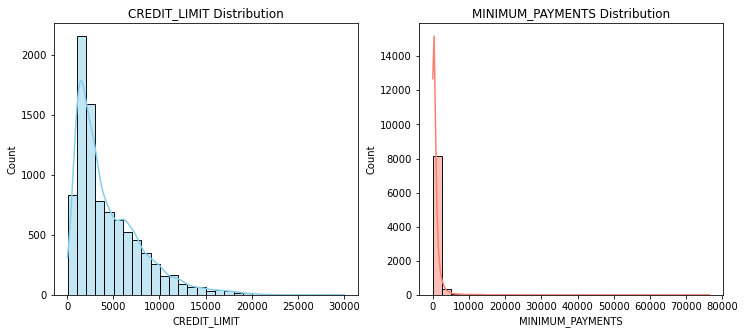

In [7]:
# Plotting the distribution of CREDIT_LIMIT and MINIMUM_PAYMENTS
plt.figure(figsize=(12, 5))

# Plot for CREDIT_LIMIT
plt.subplot(1, 2, 1)
sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True, color='skyblue')
plt.title('CREDIT_LIMIT Distribution')

# Plot for MINIMUM_PAYMENTS
plt.subplot(1, 2, 2)
sns.histplot(df['MINIMUM_PAYMENTS'].dropna(), bins=30, kde=True, color='salmon')
plt.title('MINIMUM_PAYMENTS Distribution')

plt.show()


In [8]:
# These two graphs are all right skewed, it's better to use mediam because mediam is less sensitive to outliers than mean.Filling missing values with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [9]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [10]:
df.dropna(inplace=True)

In [11]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [12]:
print(df['TENURE'].unique())

[12  8 11  9 10  7  6]


In [13]:
df.groupby('TENURE').count()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
TENURE,,,,,,,,,,,,,,,,
6,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
7,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
8,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
9,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
10,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236
11,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
12,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584


In [14]:
#Feature scaling
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [15]:
#PCA analysis
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
#df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [2.72976713e-01 2.03137796e-01 8.81318170e-02 7.47952439e-02
 6.22472925e-02 5.74005645e-02 4.88342555e-02 4.29920325e-02
 3.79825870e-02 3.08000227e-02 2.37225104e-02 1.77336964e-02
 1.42785685e-02 1.21691956e-02 1.01266703e-02 2.67034839e-03
 6.85226796e-07]
Cumulative explained variance ratio: [0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943
 0.80752368 0.85051572 0.8884983  0.91929833 0.94302084 0.96075453
 0.9750331  0.9872023  0.99732897 0.99999931 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497,-0.081637,-0.187992,0.149962,0.048266,-0.000161
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171,-0.034550,-0.733098,-0.532951,-0.082909,0.000003
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870,0.696544,0.042389,0.221683,0.511325,0.000022
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186,-0.127887,-0.417356,-0.091930,-0.016174,-0.000010
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719,-0.037507,-0.040989,0.290908,-0.070603,-0.000081


In [16]:
# let's reduce to 6 components as 6 compoents capture 76% variance
# Perform PCA
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.27297671 0.2031378  0.08813182 0.07479524 0.06224729 0.05740056]
Cumulative explained variance ratio: [0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### EDA analysis


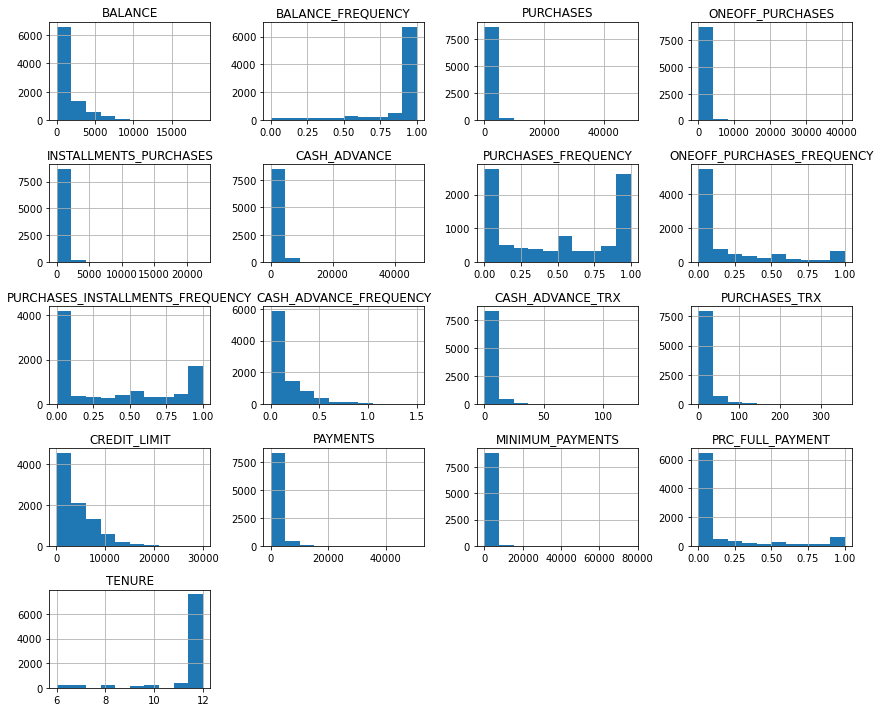

In [17]:
df_pca.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

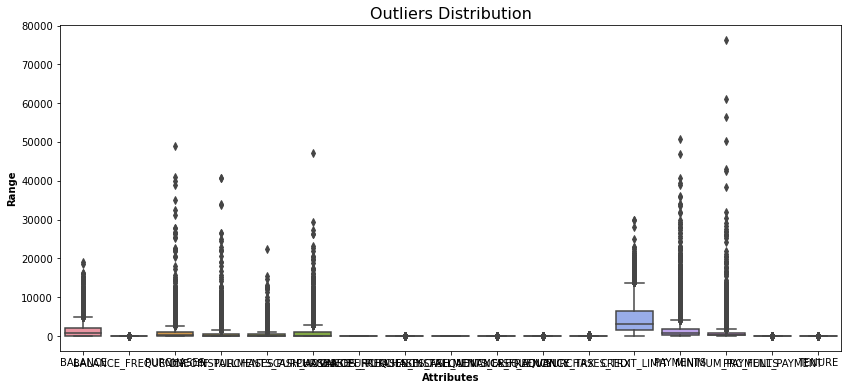

In [18]:
def show_boxplot(df_pca):
    plt.rcParams['figure.figsize'] = [14, 6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')

show_boxplot(df_pca)

In [19]:
#As the dataset are all nuermical values, using boxplot to remove each of them is time consuming. 
#In this credit card dataset, there are many extreme values. 0.25 and 0.75 is not enough so we used 0.05 and 0.95.

def remove_outliers(df_pca):
    df_clean = df_pca.copy()
    for col in df_pca.columns:
        Q1 = df_pca[col].quantile(0.05)
        Q3 = df_pca[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers(df_pca)
print(df_clean.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

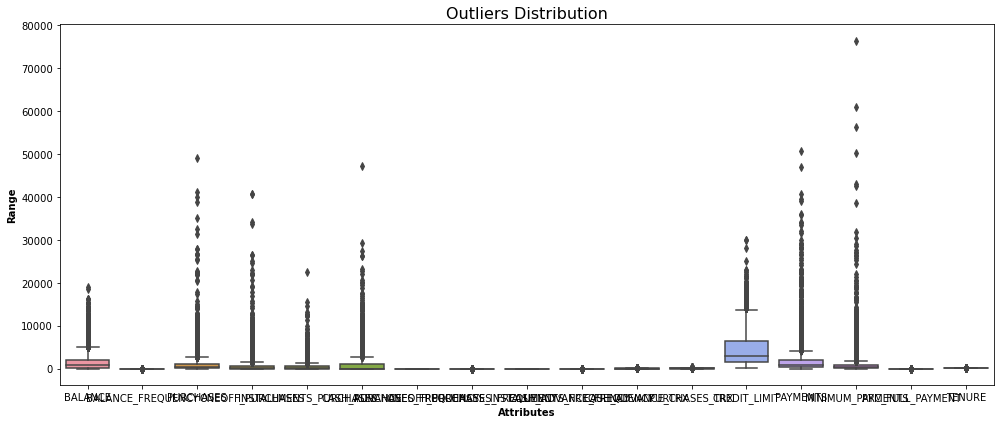

In [20]:
show_boxplot(df_clean)
plt.tight_layout()

In [21]:
df_clean.shape

(8570, 17)

In [22]:
df_clean = df_clean[df_clean['BALANCE'] <= 10000]
df_clean = df_clean[df_clean['PURCHASES'] <= 4000]
df_clean = df_clean[df_clean['ONEOFF_PURCHASES'] <= 3000]
df_clean = df_clean[df_clean['INSTALLMENTS_PURCHASES'] <= 3000]
df_clean = df_clean[df_clean['PURCHASES_FREQUENCY'] <= 5000]
df_clean = df_clean[df_clean['CREDIT_LIMIT'] <= 20000]
df_clean = df_clean[df_clean['PAYMENTS'] <= 6000]
df_clean = df_clean[df_clean['MINIMUM_PAYMENTS'] <= 4000]


In [23]:
df_clean.shape

(7897, 17)

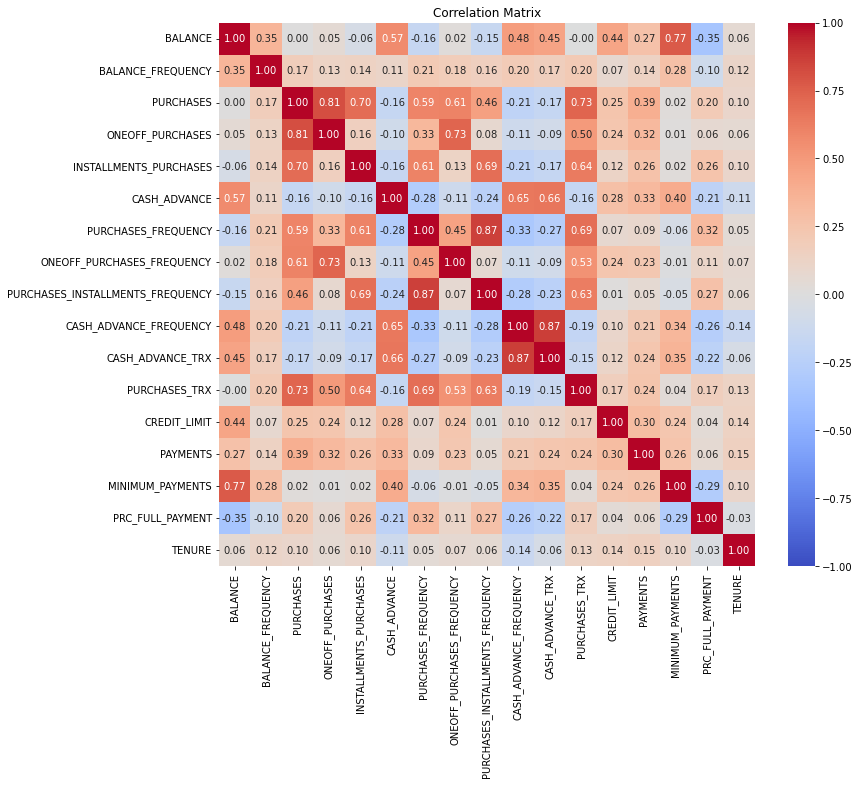

In [24]:
correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


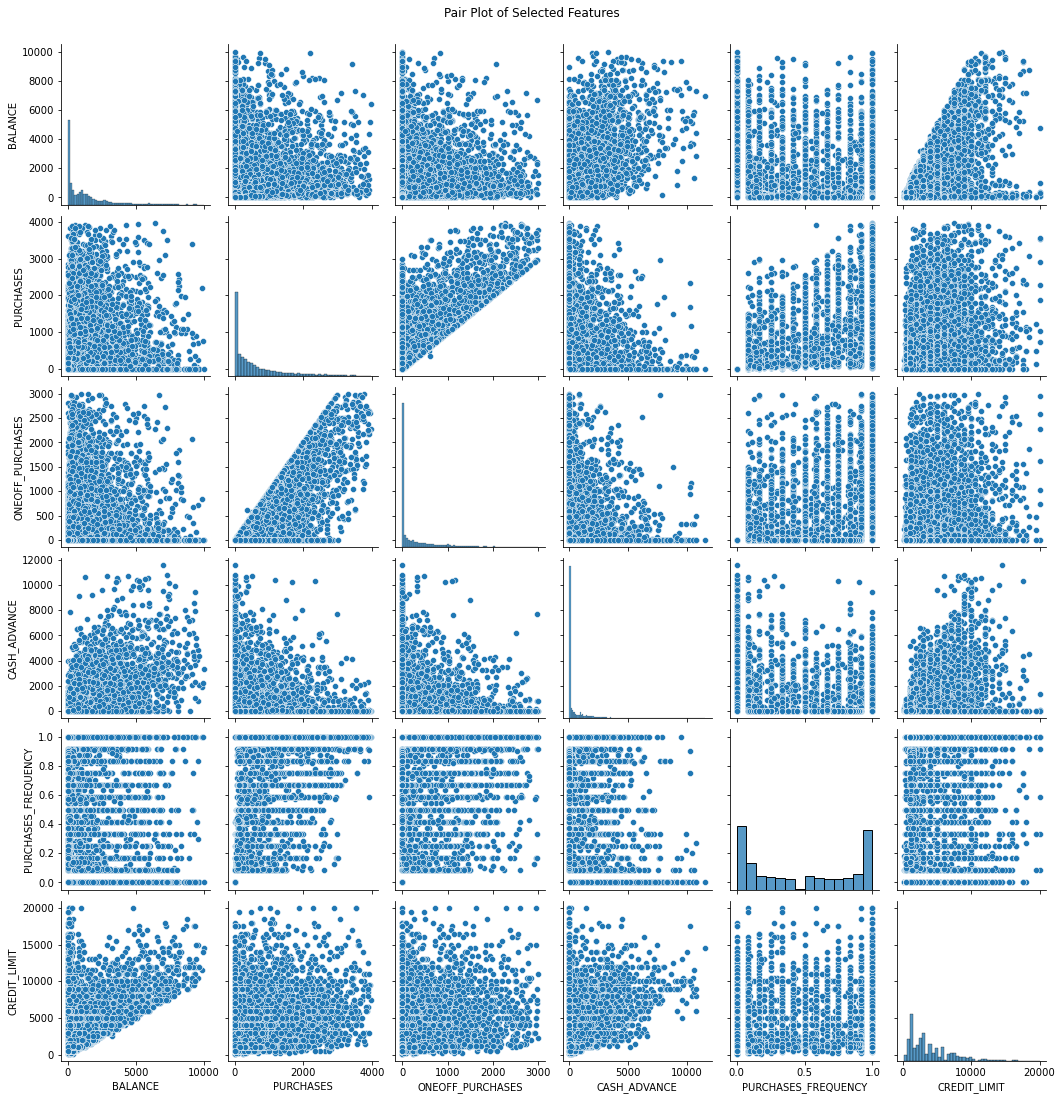

In [25]:
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT']
df_subset = df_clean[selected_features]

# Plotting the pair plot
sns.pairplot(df_subset)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [26]:
descriptive_stats = df_clean.describe()
print(descriptive_stats)

           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  7897.000000        7897.000000  7897.000000       7897.000000   
mean   1299.603711           0.868509   620.754329        330.167289   
std    1677.166678           0.244342   783.626438        564.940698   
min       0.000000           0.000000     0.000000          0.000000   
25%      95.843629           0.833333    29.500000          0.000000   
50%     738.992204           1.000000   317.400000          0.000000   
75%    1738.454303           1.000000   900.450000        435.080000   
max    9993.352521           1.000000  3970.800000       2991.450000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             7897.000000   7897.000000          7897.000000   
mean               290.833803    772.422646             0.469272   
std                461.370731   1450.354792             0.396104   
min                  0.000000      0.000000             0.000000   
25%        

### Clustering

In [31]:
X = df_clean.copy()
X = np.array(X.T)

In [32]:
X

array([[4.09007490e+01, 3.20246742e+03, 2.49514886e+03, ...,
        2.33986730e+01, 1.34575640e+01, 3.72708075e+02],
       [8.18182000e-01, 9.09091000e-01, 1.00000000e+00, ...,
        8.33333000e-01, 8.33333000e-01, 6.66667000e-01],
       [9.54000000e+01, 0.00000000e+00, 7.73170000e+02, ...,
        1.44400000e+02, 0.00000000e+00, 1.09325000e+03],
       ...,
       [1.39509787e+02, 1.07234022e+03, 6.27284787e+02, ...,
        8.24183690e+01, 5.57556280e+01, 8.82889560e+01],
       [0.00000000e+00, 2.22222000e-01, 0.00000000e+00, ...,
        2.50000000e-01, 2.50000000e-01, 0.00000000e+00],
       [1.20000000e+01, 1.20000000e+01, 1.20000000e+01, ...,
        6.00000000e+00, 6.00000000e+00, 6.00000000e+00]])

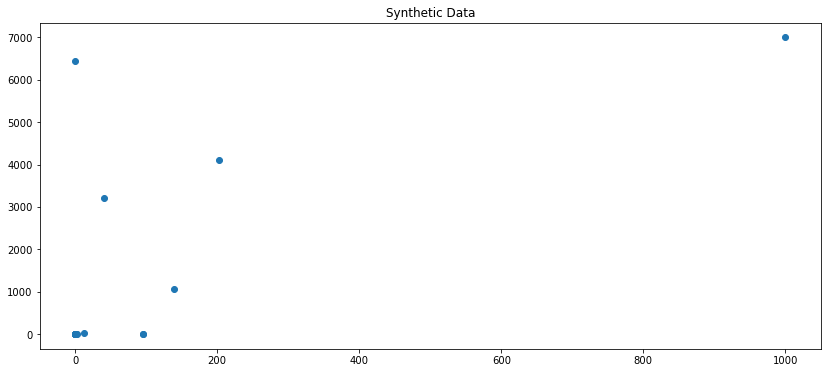

In [33]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Synthetic Data')
plt.show()


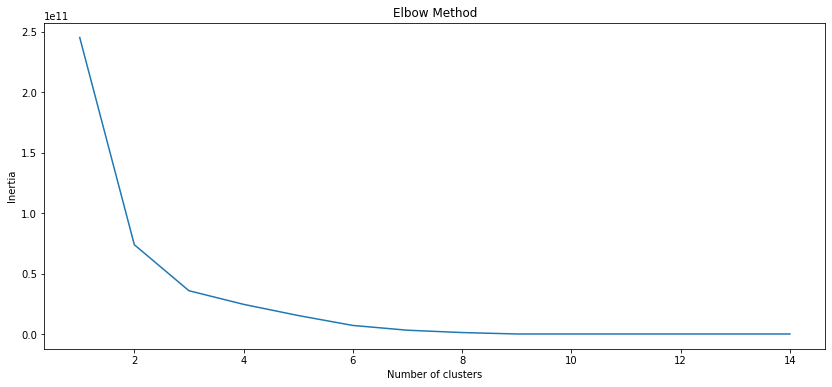

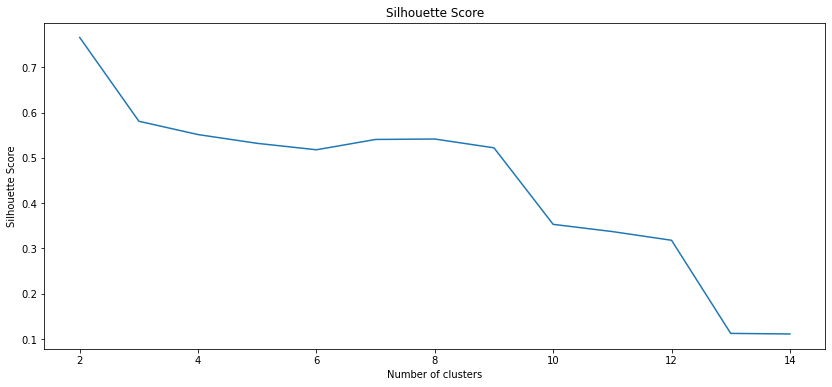

In [34]:
# Importing required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette Score: 0.5515905194918412


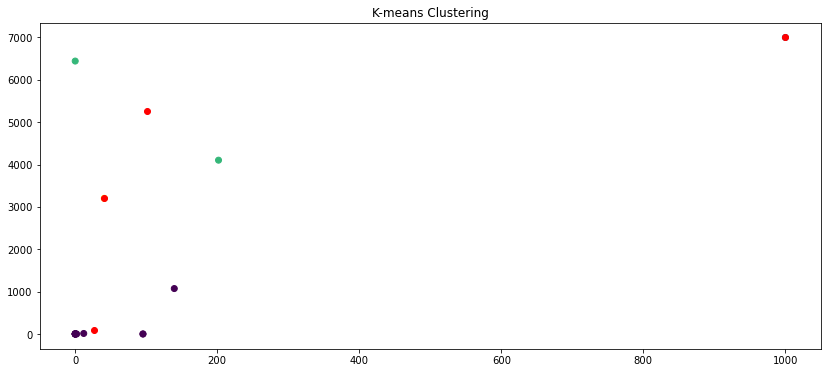

In [35]:
# Importing required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Applying K-means with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


In [36]:
from sklearn.metrics import silhouette_score

In [37]:
pip install scipy

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


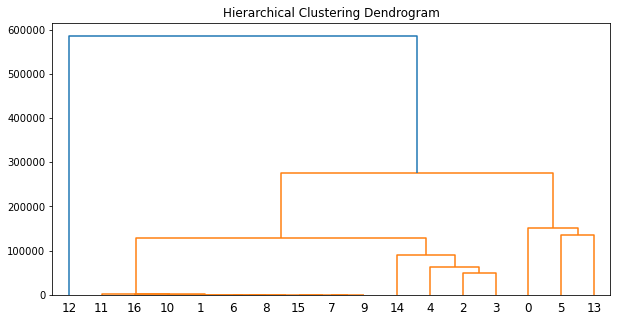

In [38]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [39]:
from sklearn.metrics import silhouette_score


Affinity Propagation Silhouette Score: 0.5322458018889581


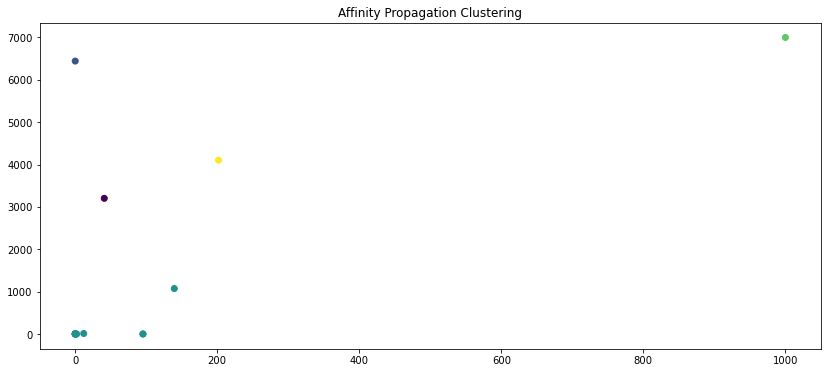

In [40]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()


In [41]:
dbscan_sil_score = silhouette_score(X, labels)

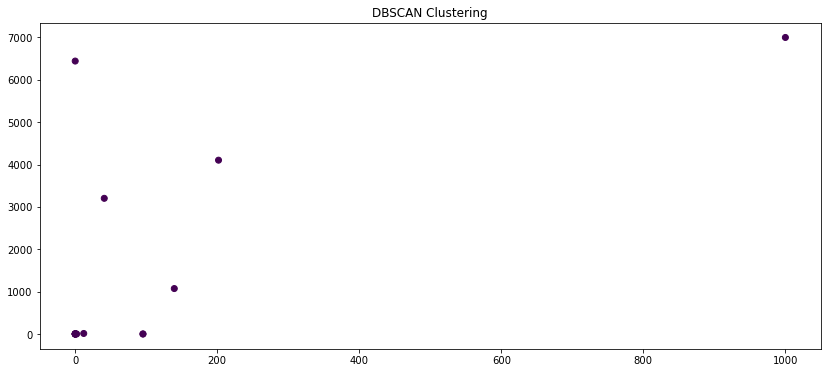

DBSCAN Silhouette Score: 0.5515905194918412


In [42]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

In [52]:
from sklearn.cluster import AgglomerativeClustering

# Creating a model
model = AgglomerativeClustering(n_clusters=17)

# Fitting and predicting to get cluster labels for each data point
cluster_labels = model.fit_predict(df_clean)

# Adding the cluster labels to your DataFrame
df_clean['Cluster'] = cluster_labels

# Showing the first few rows of the DataFrame with the cluster labels
df_clean.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,16
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,10
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,11


In [55]:
from sklearn.cluster import KMeans

# Assume X is your feature matrix
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_


In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Number of clusters
n_clusters = 17

# Running KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(df_clean)

# Calculating silhouette score
silhouette_avg = silhouette_score(df_clean, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Adding cluster labels to the dataframe
df_clean['Cluster'] = labels

# Displaying the first few rows of the dataframe with cluster labels
df_clean.head()



Silhouette Score: 0.23095302757043207


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,14
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [60]:
centroids = df_clean.groupby('Cluster').mean()
print(centroids)
df_clean['Cluster'] = labels

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         188.391714           0.759744   335.543496        120.879890   
1        3436.033131           0.990216  1010.321947        634.576283   
2         420.129825           0.840552   981.575284        593.282163   
3        1372.914524           0.881302   165.477102        101.252723   
4         235.979785           0.732865   448.238214        178.704070   
5        4487.714115           0.999398   586.569386        335.676751   
6         501.815249           0.791300  1304.463774        815.956698   
7         467.678349           0.820625   570.832713        290.981768   
8        5701.724905           0.936814   388.666907        246.149278   
9         961.454364           0.940324  2314.492342       1368.219399   
10       1569.267331           0.886062   332.986901        202.572066   
11        694.080317           0.90741

In [61]:
print(df_clean.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [62]:
# Calculate the centroids of each cluster
centroids = df_clean.groupby('Cluster').mean()
centroids


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,188.391714,0.759744,335.543496,120.879890,215.025017,154.773239,0.510054,0.088491,0.415492,0.057055,0.995202,7.914325,1241.263422,456.436935,176.198084,0.211489,10.904729
1,3436.033131,0.990216,1010.321947,634.576283,375.745664,703.127499,0.536647,0.319027,0.362354,0.133706,2.407080,16.163717,9074.336283,1654.916264,926.726628,0.004091,11.893805
2,420.129825,0.840552,981.575284,593.282163,388.293121,224.189332,0.602086,0.330138,0.391699,0.036512,0.684397,15.542553,9934.574468,1254.158867,206.688869,0.296757,11.691489
3,1372.914524,0.881302,165.477102,101.252723,64.272789,2158.517819,0.165060,0.063899,0.104479,0.330999,7.651416,2.884532,2758.932462,979.634944,481.984033,0.036698,10.747277
4,235.979785,0.732865,448.238214,178.704070,270.030626,83.247037,0.533682,0.117949,0.430105,0.025641,0.451197,9.730203,3282.927154,552.446256,184.110259,0.236431,11.680479
5,4487.714115,0.999398,586.569386,335.676751,250.892635,1305.010371,0.372095,0.171078,0.255418,0.267208,5.808664,11.364621,5689.350181,1385.773497,1647.156757,0.000000,11.787004
6,501.815249,0.791300,1304.463774,815.956698,488.507075,234.777237,0.643125,0.403445,0.373242,0.036392,0.735849,17.716981,15301.886792,1750.847859,247.373532,0.419673,11.801887
7,467.678349,0.820625,570.832713,290.981768,280.298920,154.410394,0.535887,0.224098,0.360868,0.037008,0.684211,11.318489,6236.713287,787.458118,226.667949,0.252360,11.798920
8,5701.724905,0.936814,388.666907,246.149278,142.517629,7834.117806,0.247686,0.113915,0.155257,0.449500,12.092784,6.309278,10082.474227,2270.152440,1772.583799,0.004959,11.020619


<AxesSubplot:xlabel='Cluster'>

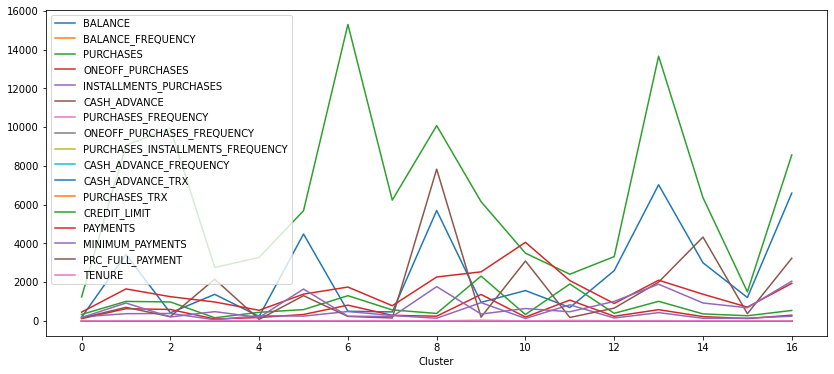

In [63]:
centroids.plot()

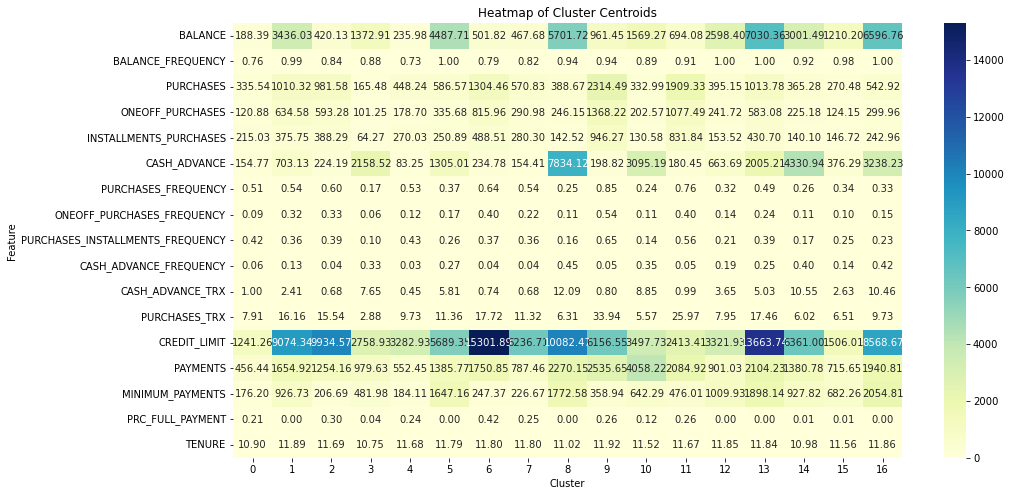

In [64]:
# Visualize the cluster centroids as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(centroids.T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Cluster Centroids')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()
